In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
pd.options.display.max_colwidth = 100

In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
cdata = pd.read_csv('data/conversion_data.csv')

cdata.head()



,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
cdata.country.value_counts()
cdata.source.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [5]:
cdata.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [6]:
# sns.pairplot(cdata)

In [7]:
cdata[cdata['age']>100] #two likely outliers

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [8]:
cdata=cdata[cdata['age']<100]  # dropping outliers

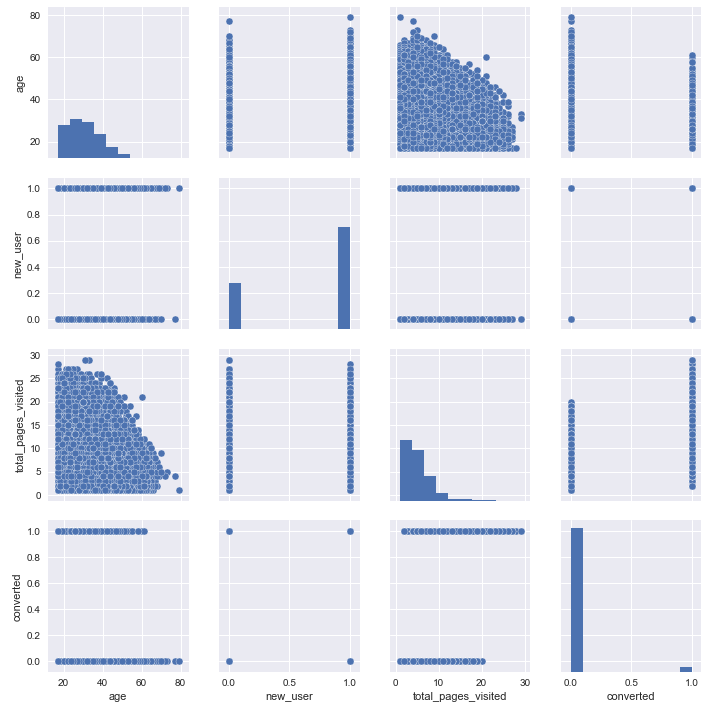

In [9]:
sns.pairplot(cdata)

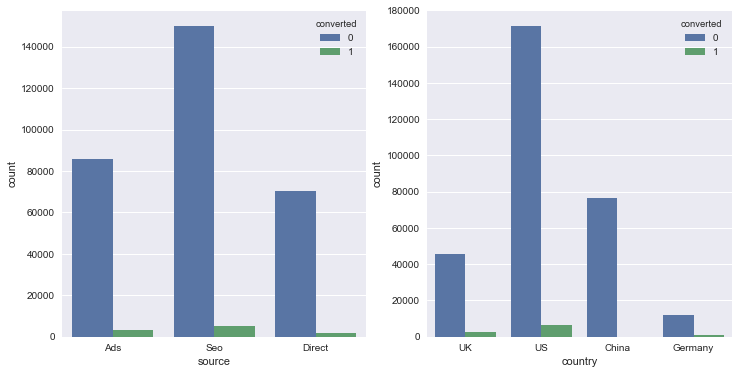

In [10]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 6))


# sns.countplot(x='Age_years',data=tdata2, ax=ax1, hue='Solve Match Pos')
g=sns.countplot(x=cdata['source'], hue=cdata['converted'], ax=ax1)
g=sns.countplot(x=cdata['country'],hue=cdata['converted'], ax=ax2)



In [48]:
tdf_counts=cdata.groupby(['country'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts_c=tdf_counts[tdf_counts["converted"]==1].sort_values(by=["percentage"])
tdf_counts_c

tdf_counts=cdata.groupby(['source'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts_s=tdf_counts[tdf_counts["converted"]==1].sort_values(by=["percentage"])


,country,converted,percentage
1,China,1,0.133156
7,US,1,3.780069
5,UK,1,5.261203
3,Germany,1,6.242819


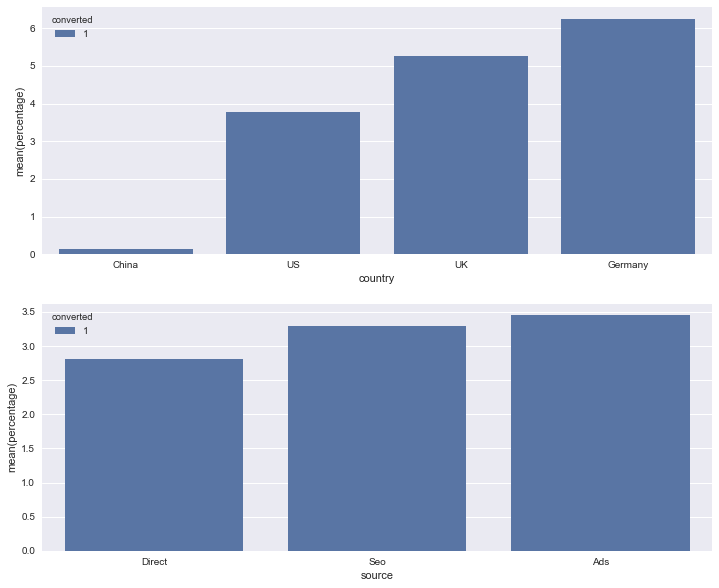

In [12]:


f, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 10))

g=sns.barplot(x="country",y="percentage", data=tdf_counts_c,hue='converted', ax=ax1)
g=sns.barplot(x="source",y="percentage", data=tdf_counts_s,hue='converted', ax=ax2)

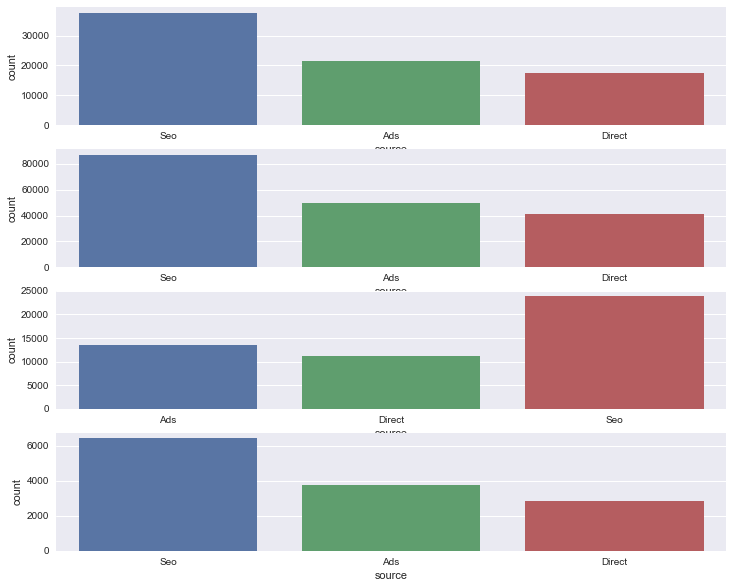

In [51]:
cdata_china=cdata[cdata['country']=='China']
cdata_US=cdata[cdata['country']=='US']
cdata_UK=cdata[cdata['country']=='UK']
cdata_Germany=cdata[cdata['country']=='Germany']



f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12, 10))
g=sns.countplot(x=cdata_china['source'],  ax=ax1)

g=sns.countplot(x=cdata_US['source'],  ax=ax2)

g=sns.countplot(x=cdata_UK['source'],  ax=ax3)

g=sns.countplot(x=cdata_Germany['source'],  ax=ax4)
# g=sns.countplot(x=cdata_china['source'], hue=cdata_china['converted'], ax=ax4)

# g=sns.barplot(x="operative_system",y="percentage", data=tdf_counts_os,hue='converted', ax=ax2)


In [14]:
cdata2=pd.get_dummies(columns=['source', 'country'], data=cdata) #One hot encoding
cdata2.head()

,age,new_user,total_pages_visited,converted,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US
0,25,1,1,0,1,0,0,0,0,1,0
1,23,1,5,0,0,0,1,0,0,0,1
2,28,1,4,0,0,0,1,0,0,0,1
3,39,1,5,0,0,0,1,1,0,0,0
4,30,1,6,0,0,0,1,0,0,0,1


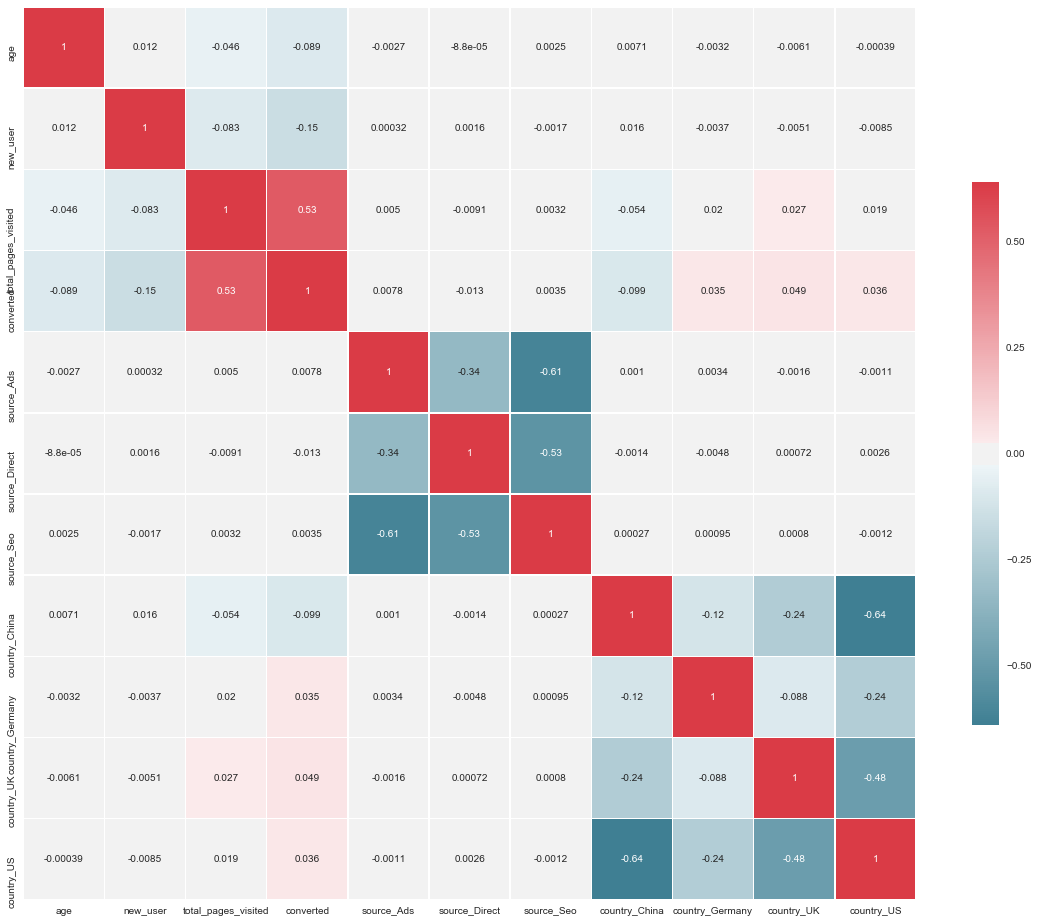

In [15]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(cdata2.corr(),  cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
y1=cdata2['converted'].copy() # Make a copy of labels
cdata2.drop(labels=['converted'], axis=1, inplace=True)
sub_train=cdata2.copy(deep=True) # copy of features
sub_train.head()

,age,new_user,total_pages_visited,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US
0,25,1,1,1,0,0,0,0,1,0
1,23,1,5,0,0,1,0,0,0,1
2,28,1,4,0,0,1,0,0,0,1
3,39,1,5,0,0,1,1,0,0,0
4,30,1,6,0,0,1,0,0,0,1


In [17]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #Split data into test and train
data_train, data_test, Y_train, Y_test= train_test_split(sub_train, y1, test_size=0.3, random_state=5) # 70:30 split

# T=preprocessing.StandardScaler().fit_transform(data_train)

X_train=data_train
X_test=data_test



# X_train=preprocessing.MinMaxScaler().fit_transform(data_train)
# X_test=preprocessing.MinMaxScaler().fit_transform(data_test)
#T=preprocessing.MaxAbsScaler().fit_transform(data_train)
#T=data_train
#T=preprocessing.Normalizer().fit_transform(data_train)
# Random forest

random_forest = RandomForestClassifier(n_estimators=150,min_samples_leaf=5, max_depth=3, max_features=3)
random_forest.fit(X_train, Y_train)
Y_pred_RF = random_forest.predict(X_test)
score_random_forest_train=random_forest.score(X_train, Y_train)*100
score_random_forest_train

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

98.055010888324645

In [18]:
score_random_forest_test=random_forest.score(X_test, Y_test)*100
score_random_forest_test

98.120387940122285

array([  3.81247610e-02,   1.13085837e-01,   7.66231939e-01,
         1.67771080e-04,   4.80705571e-04,   3.82686270e-05,
         6.84601098e-02,   3.02778457e-03,   5.66835614e-03,
         4.71446738e-03])

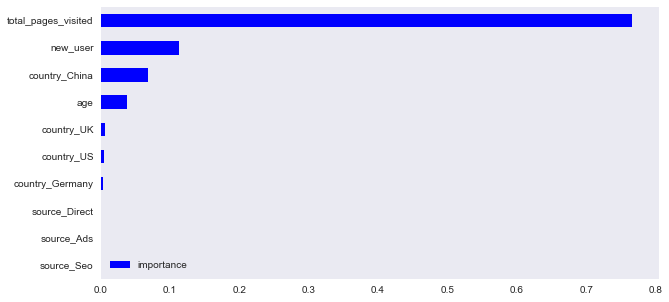

In [19]:
# predicting feature importance

names = cdata2.columns
ratios = random_forest.feature_importances_
ratios

feature_important = pd.DataFrame(index=names, data=ratios, columns=['importance'])
feature_important = feature_important.sort_values(by=['importance'], ascending=True)
feature_important.plot(kind='barh', stacked=True, color=['blue'], grid=False, figsize=(10, 5))

In [20]:
from sklearn import metrics
print(metrics.classification_report( Y_test, Y_pred_RF))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     91807
          1       0.95      0.44      0.60      3053

avg / total       0.98      0.98      0.98     94860



In [21]:
cdata.converted.value_counts(normalize=True).mul(100)

0    96.774806
1     3.225194
Name: converted, dtype: float64

## As expected, recall for the group of interest converted users is low, because of imbalance in the data. I will use resampling (undersampling majority group/oversampling minority group) to address this

In [23]:
from imblearn.over_sampling import SMOTE


In [25]:
smote = SMOTE(ratio='auto', kind='regular')
smox, smoy = smote.fit_sample(sub_train, y1)

In [26]:
# import nltk
# import sklearn

# print('The nltk version is {}.'.format(nltk.__version__))
# print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.2.3.
The scikit-learn version is 0.19.0.


In [30]:
len(smox)

612000

In [31]:
len(sub_train)

316198

In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #Split data into test and train
data_train, data_test, Y_train, Y_test= train_test_split(smox, smoy, test_size=0.3, random_state=5) # 70:30 split

# T=preprocessing.StandardScaler().fit_transform(data_train)

X_train=data_train
X_test=data_test



# X_train=preprocessing.MinMaxScaler().fit_transform(data_train)
# X_test=preprocessing.MinMaxScaler().fit_transform(data_test)
#T=preprocessing.MaxAbsScaler().fit_transform(data_train)
#T=data_train
#T=preprocessing.Normalizer().fit_transform(data_train)
# Random forest

random_forest = RandomForestClassifier(n_estimators=150,min_samples_leaf=5, max_depth=3, max_features=3)
random_forest.fit(X_train, Y_train)
Y_pred_RF = random_forest.predict(X_test)
score_random_forest_train=random_forest.score(X_train, Y_train)*100
score_random_forest_train

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

94.497198879551831

In [33]:
score_random_forest_test=random_forest.score(X_test, Y_test)*100
score_random_forest_test

94.465686274509807

array([  3.31978185e-02,   1.88137167e-01,   6.29544497e-01,
         4.14325055e-05,   2.58073401e-04,   2.77442925e-05,
         1.23264198e-01,   2.43632420e-03,   9.65338896e-03,
         1.34393570e-02])

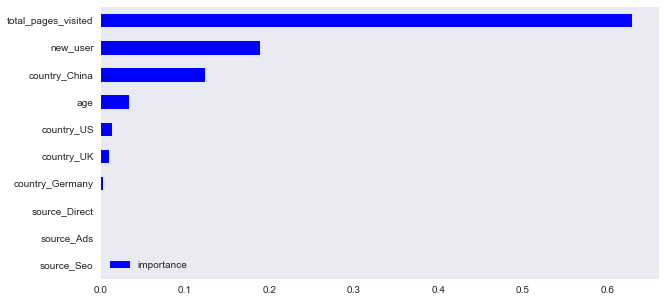

In [34]:


# predicting feature importance

names = cdata2.columns
ratios = random_forest.feature_importances_
ratios

feature_important = pd.DataFrame(index=names, data=ratios, columns=['importance'])
feature_important = feature_important.sort_values(by=['importance'], ascending=True)
feature_important.plot(kind='barh', stacked=True, color=['blue'], grid=False, figsize=(10, 5))

In [37]:
from sklearn import metrics
print(metrics.classification_report( Y_test, Y_pred_RF))

             precision    recall  f1-score   support

          0       0.95      0.94      0.94     91522
          1       0.94      0.95      0.94     92078

avg / total       0.94      0.94      0.94    183600



## Recall is now 95% for converted group after balancing the dataset with SMOTE!

In [35]:
#10-fold cross validation to check for overfitting 

from sklearn import cross_validation as cval

cval_score=cval.cross_val_score(random_forest, sub_train, y1, cv=10)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
mean_cval=cval_score.mean()*100
std_cval=cval_score.std()*100
mean_cval
std_cval

98.240974814801135

0.17698125147672558

In [ ]:
from sklearn.learning_curve import learning_curve
train_sizes, train_scores, test_scores = learning_curve(random_forest, sub_train, y1, cv=5,train_sizes=np.linspace(0.1, 1.0, 10))


<Container object of 3 artists>

<Container object of 3 artists>

(0.95, 1.0)

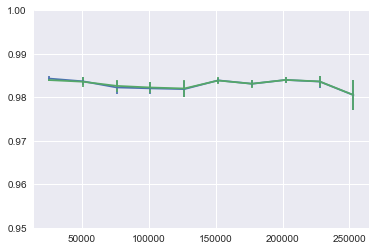

In [47]:
plt.errorbar(train_sizes, np.mean(train_scores, axis=1), np.std(train_scores,axis=1))
plt.errorbar(train_sizes, np.mean(test_scores, axis=1), np.std(test_scores, axis=1))
plt.ylim(.95,1.0)

# Summary:

### 1. Recall for the converted group improved from 44% to 95% upon balancing the imbalanced dataset (conversion ratio ~ 3%).
### 2. Conversion rates vary widely by country Germany has the highest rate at 6.2% and China has the lowest at 0.1%. I would recommend pulling out advertising money (maybe even the product) from China and move focus to Germany which has a 60x conversion rate.
### 3. *Number of page visits* is the most important feature, customers that stay on the website longer are more inclined to buy the product. 
### 4. Whether the customer is a *new user* is the next important feature; new users are less likely to purchase the product.

In [49]:
tdf_counts_c

,country,converted,percentage
1,China,1,0.133156
7,US,1,3.780069
5,UK,1,5.261203
3,Germany,1,6.242819
